## Author Classification 

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np 
import glob
import os
import cv2
import seaborn as sns
import pandas as pd
import random
import matplotlib.pyplot as plt
import plotly.offline as py
from sklearn.metrics import precision_recall_fscore_support
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from sklearn.decomposition import PCA
from matplotlib import pyplot

%matplotlib inline

# Data Cleaning for training set 

In [ ]:
authors=[]
titles=[]
texts=[]
for fol in glob.glob("F:\\data\\Author Classification\\Training\\*"):
    for index, path in enumerate(glob.glob(os.path.join(fol,"*.txt"))):
        arr = path.split("\\")
        authors.append(arr[4])
        titles.append(str(arr[5]).replace(".txt",""))
        with open(path, encoding="utf8", errors='ignore') as myfile:
            texts.append(myfile.read().rstrip().lower())

In [ ]:
names = ['abbott','jacob','abbott','john','allen','grant','altsheler','joseph','appleton',
         'victor','horatio','alger','timothy','shay','project gutenberg ebook','gutenberg ebook','gutenberg',
         'the project gutenberg online distributed proofreading team','www gutenberg org','www pgdp net',' the project ebook',
         ' this project ebook','www gutenberg org','the project ebook','this project ebook','this project  ebook',' the project ebook']

In [ ]:
for index, value in enumerate(texts):
    try:
        texts[index] = str(texts[index]).split("START OF")[1]
        texts[index] =" ".join(texts[index].split())
    except IndexError:
        pass
    for i in value.split():
        if i in (names):
            texts[index]= str(texts[index]).replace(i,"")   

In [ ]:
import re
for index, value in enumerate(texts):
    #texts[index] = re.sub(r'[^\w.]', ' ',value)
    texts[index] = re.sub(' +',' ',value)

In [ ]:
data = pd.DataFrame({'author':authors,'title':titles})
data['text'] = texts

In [ ]:
data['text'] = data['text'].str.replace('\r', '')
data['text'] = data['text'].str.replace('!', '')
data['text'] = data['text'].str.replace('@', '')
data['text'] = data['text'].str.replace('#', '')
data['text'] = data['text'].str.replace('$', '')
data['text'] = data['text'].str.replace('%', '')
data['text'] = data['text'].str.replace('^', '')
data['text'] = data['text'].str.replace('&', '')
data['text'] = data['text'].str.replace('*', '')
data['text'] = data['text'].str.replace('\n', ' ')
data['text'] = data['text'].str.replace("\'s", '')
data['text'] = data['text'].str.replace("\'s", '')
data['text'] = data['text'].str.replace("\'", '')
data['text'] = data['text'].str.replace("'", '')

In [ ]:
data['sentence'] = data.text.str.split('.')

In [ ]:
print("data shape{0}".format(data.shape))
data.head()

data shape(193, 4)


author                 title  \
0  Abbott Jacob   Alexander the Great   
1  Abbott Jacob                 Bruno   
2  Abbott Jacob  Caleb in the Country   
3  Abbott Jacob             Charles I   
4  Abbott Jacob             Cleopatra   

                                                text  \
0  ﻿the project ebook, alexander the great, by   ...   
1  ﻿the project ebook of bruno, by   this ebook i...   
2  ﻿the project ebook, caleb in the country, by  ...   
3  ﻿the project ebook of charles i, by   this ebo...   
4  ﻿the project ebook, cleopatra, by    this eboo...   

                                            sentence  
0  [﻿the project ebook, alexander the great, by  ...  
1  [﻿the project ebook of bruno, by   this ebook ...  
2  [﻿the project ebook, caleb in the country, by ...  
3  [﻿the project ebook of charles i, by   this eb...  
4  [﻿the project ebook, cleopatra, by    this ebo...

# Data Cleaning for testing set 

In [ ]:
authors1=[]
titles1=[]
texts1=[]
for fol in glob.glob("F:\\data\\Author Classification\\Testing\\*"):
    for index, path in enumerate(glob.glob(os.path.join(fol,"*.txt"))):
        arr = path.split("\\")
        authors1.append(arr[4])
        titles1.append(str(arr[5]).replace(".txt",""))
        with open(path, encoding="utf8", errors='ignore') as myfile:
            texts1.append(myfile.read().rstrip().lower())

In [ ]:
import re
for index, value in enumerate(texts1):
    texts[index] = re.sub(' +',' ',value)

In [ ]:
for index, value in enumerate(texts1):
    try:
        texts1[index] = str(texts1[index]).split("START OF")[1]
        texts1[index] =" ".join(texts1[index].split())
    except IndexError:
        pass
    for i in value.split():
        if i in (names):
            texts1[index]= str(texts1[index]).replace(i,"")   

In [ ]:
data_test = pd.DataFrame({'author':authors1,'title':titles1})
data_test['text'] = texts1
data_test['text'] = data_test['text'].str.replace('\r', '')
data_test['text'] = data_test['text'].str.replace('!', '')
data_test['text'] = data_test['text'].str.replace('@', '')
data_test['text'] = data_test['text'].str.replace('#', '')
data_test['text'] = data_test['text'].str.replace('$', '')
data_test['text'] = data_test['text'].str.replace('%', '')
data_test['text'] = data_test['text'].str.replace('^', '')
data_test['text'] = data_test['text'].str.replace('&', '')
data_test['text'] = data_test['text'].str.replace('*', '')
data_test['text'] = data_test['text'].str.replace('\n', ' ')
data_test['text'] = data_test['text'].str.replace("\'s", '')
data_test['text'] = data_test['text'].str.replace("\'s", '')
data_test['text'] = data_test['text'].str.replace("\'", '')
data_test['text'] = data_test['text'].str.replace("'", '')
data_test['sentence'] = data_test.text.str.split('.')
print("data shape{0}".format(data_test.shape))
data_test.head()

data shape(49, 4)


author                                   title  \
0  Abbott Jacob               Jonas on a Farm in Winter   
1  Abbott Jacob  Mary Queen of Scots, Makers of History   
2  Abbott Jacob               omulus, Makers of History   
3  Abbott Jacob                         Peter the Great   
4  Abbott Jacob                             Richard III   

                                                text  \
0  ﻿the project  ebook, jonas on a farm in winter...   
1  ﻿project  mary queen of scots, makers of histo...   
2  ﻿the project  ebook of romulus, makers of hist...   
3  ﻿the project  ebook, peter the great, by     t...   
4  ﻿the project  ebook of richard iii, by    this...   

                                            sentence  
0  [﻿the project  ebook, jonas on a farm in winte...  
1  [﻿project  mary queen of scots, makers of hist...  
2  [﻿the project  ebook of romulus, makers of his...  
3  [﻿the project  ebook, peter the great, by     ...  
4  [﻿the project  ebook of richard iii, by    thi...

# Exploratory data analysis

### Training set

In [ ]:
X = data.text.tolist()
y = data.author
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
data = [go.Bar(
            x = y.unique(),
            y = y.value_counts().values,
            marker= dict(colorscale='Jet',
                         color = y.value_counts().values))]
layout = go.Layout(  title='Số lượng đầu sách của mỗi tác giả')
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='basic-bar')
del X
del y

### Testing set

In [ ]:
X_test_set = data_test.text.tolist()
y_test_set = data_test.author
data1= [go.Bar(
            x = y_test_set.unique(),
            y = y_test_set.value_counts().values,
            marker= dict(colorscale='Jet',
                         color = y_test_set.value_counts().values))]
layout = go.Layout(  title='Số lượng đầu sách của mỗi tác giả')
fig = go.Figure(data=data1, layout=layout)
py.iplot(fig, filename='basic-bar')
del X_test_set
del y_test_set

# Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.text, data.author, test_size=0.2, random_state=12)

In [ ]:
print("training shape: {}{}".format(X_train.shape,y_train.shape))
print("testing shape : {}{}".format(X_test.shape,y_test.shape))

training shape: (154,)(154,)
testing shape : (39,)(39,)


# TFIDF 

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vector = TfidfVectorizer(stop_words='english')

tfidf_train = tfidf_vector.fit_transform(X_train).toarray()
tfidf_test = tfidf_vector.transform(X_test).toarray()

In [ ]:
print("Training shape: {}{}".format(tfidf_train.shape,tfidf_test.shape))

Training shape: (154, 64745)(39, 64745)


In [ ]:
def plot_classification_report(y_tru, y_prd, figsize=(10, 6), ax=None):
    plt.figure(figsize=figsize)
    plt.tick_params(axis='both', which='major', labelsize=13)
    xticks = ['precision', 'recall', 'f1-score', 'support']
    yticks = list(np.unique(y_tru))
    yticks += ['avg']

    rep = np.array(precision_recall_fscore_support(y_true=y_tru, y_pred=y_prd)).T
    avg = np.mean(rep, axis=0)
    avg[-1] = np.sum(rep[:, -1])
    rep = np.insert(rep, rep.shape[0], avg, axis=0)

    sns.heatmap(rep,
                annot=True, 
                cbar=False, 
                xticklabels=xticks, 
                yticklabels=yticks,
                ax=ax)

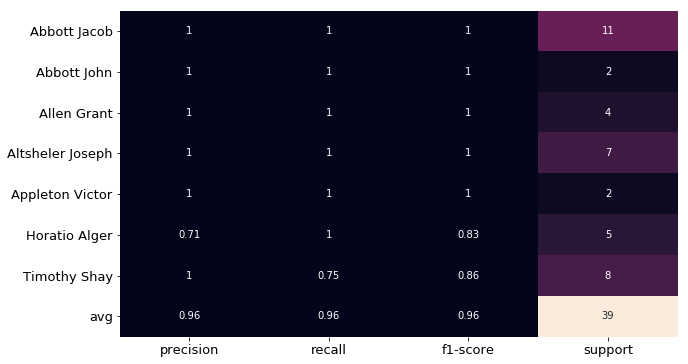

In [ ]:
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

rfc_model = RandomForestClassifier(n_estimators=100, random_state=888)
rfc_model.fit(tfidf_train,y_train)
pr = rfc_model.predict(tfidf_test)
plot_classification_report(y_test, pr)

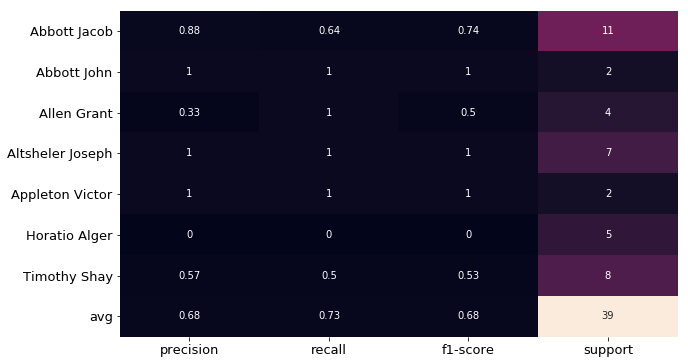

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
pr = gnb.fit(tfidf_train, y_train)
pr = gnb.predict(tfidf_test)
plot_classification_report(y_test, pr)

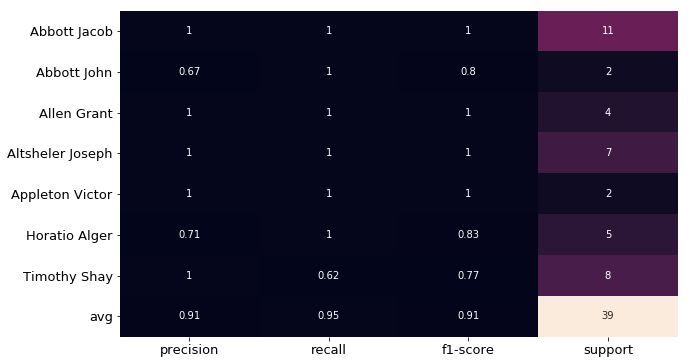

In [ ]:
from sklearn.svm import LinearSVC
clf = LinearSVC(C=1.5)
clf.fit(tfidf_train, y_train)
pr = clf.predict(tfidf_test)
plot_classification_report(y_test, pr)

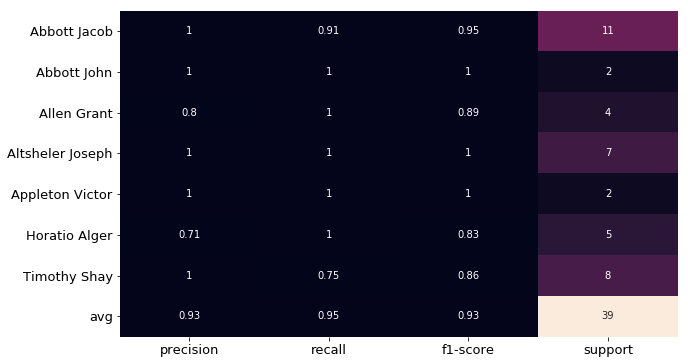

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(C=4)
clf.fit(tfidf_train, y_train)
pr = clf.predict(tfidf_test)
plot_classification_report(y_test, pr)

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X=LabelEncoder()
y_trainenc = labelencoder_X.fit_transform(y_train)
y_testenc=labelencoder_X.transform(y_test)
from keras import utils as np_utils
y_train1h = np_utils.to_categorical(y_trainenc, 7)
y_test1h = np_utils.to_categorical(y_testenc, 7)

Using TensorFlow backend.


In [ ]:
# preprocessing imports
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
# model imports
from gensim.models.ldamulticore import LdaMulticore
from gensim.models.word2vec import Word2Vec
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
# hyperparameter training imports
from sklearn.model_selection import GridSearchCV

In [ ]:
import keras
model = Sequential()
    
model.add(Dense(512, activation='relu', input_dim=tfidf_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.15))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.05))
model.add(Dense(7, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
            optimizer = keras.optimizers.RMSprop(),
             metrics=['accuracy'])
model.fit(tfidf_train, y_train1h,
        batch_size=128,
        epochs=10,
        verbose=1,
        validation_data=(tfidf_test, y_test1h))
score = model.evaluate(tfidf_test, y_test1h, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 154 samples, validate on 39 samples
Epoch 1/10
154/154 [==============================] - 6s 37ms/step - loss: 1.9435 - acc: 0.1364 - val_loss: 1.8287 - val_acc: 0.2051
Epoch 2/10
154/154 [==============================] - 3s 18ms/step - loss: 1.8225 - acc: 0.2143 - val_loss: 1.5179 - val_acc: 0.5641
Epoch 3/10
154/154 [==============================] - 3s 17ms/step - loss: 1.5164 - acc: 0.4610 - val_loss: 2.1458 - val_acc: 0.2051
Epoch 4/10
154/154 [==============================] - 3s 17ms/step - loss: 1.5555 - acc: 0.4481 - val_loss: 1.0475 - val_acc: 0.6923
Epoch 5/10
154/154 [==============================] - 2s 15ms/step - loss: 0.6893 - acc: 0.9156 - val_loss: 0.5867 - val_acc: 0.9231
Epoch 6/10
154/154 [==============================] - 2s 15ms/step - loss: 0.2333 - acc: 0.9740 - val_loss: 0.6613 - val_acc: 0.7949
Epoch 7/10
154/154 [==============================] - 2s 16ms/step - loss: 0.4081 - acc: 0.7987 - val_loss: 0.4157 - val_acc: 0.9231
Epoch 8/10
154/154 [====

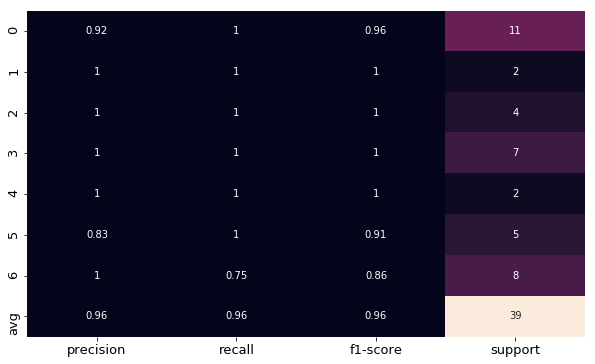

In [ ]:
from sklearn.metrics import classification_report
y_predict = model.predict_classes(tfidf_test, batch_size = None)
plot_classification_report(y_testenc, y_predict)

# BagofWord

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
count_vect.fit(data.text)
X_train_counts = count_vect.transform(X_train)
X_test_counts = count_vect.transform(X_test)
X_train_counts.shape

(154, 70411)

In [ ]:
print("training shape: {}{}".format(X_train_counts.shape,y_train.shape))
print("testing shape : {}{}".format(X_test_counts.shape,y_test.shape))

training shape: (154, 70411)(154,)
testing shape : (39, 70411)(39,)


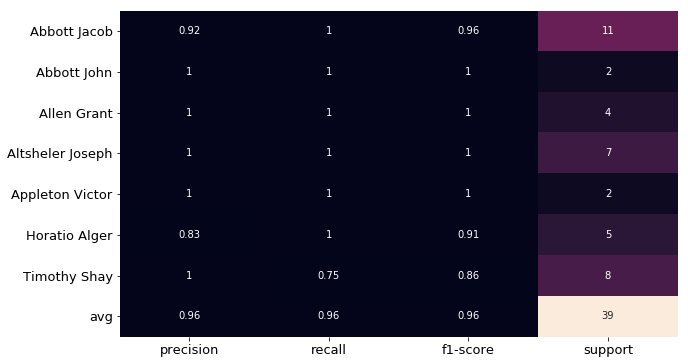

In [ ]:
rfc_model2 = RandomForestClassifier(n_estimators=100, random_state=888)
rfc_model2.fit(X_train_counts,y_train)
pr = rfc_model2.predict(X_test_counts)
plot_classification_report(y_test, pr)

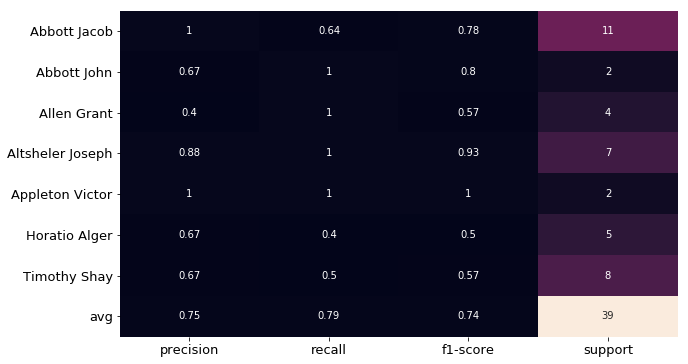

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
pr = gnb.fit(X_train_counts.toarray(), y_train)
pr = gnb.predict(X_test_counts.toarray())
plot_classification_report(y_test, pr)

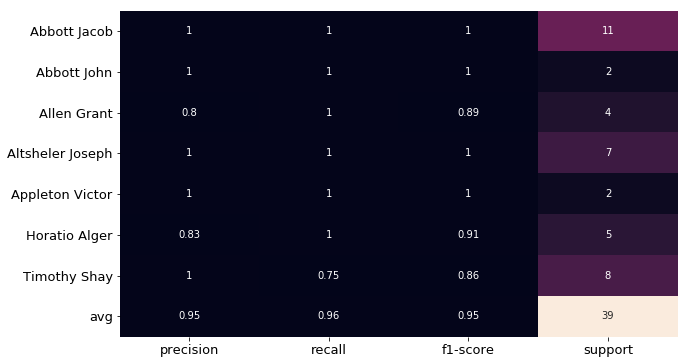

In [ ]:
from sklearn.svm import LinearSVC
clf = LinearSVC(C=1.5)
pr = clf.fit(X_train_counts.toarray(), y_train)
pr = clf.predict(X_test_counts.toarray())
plot_classification_report(y_test, pr)

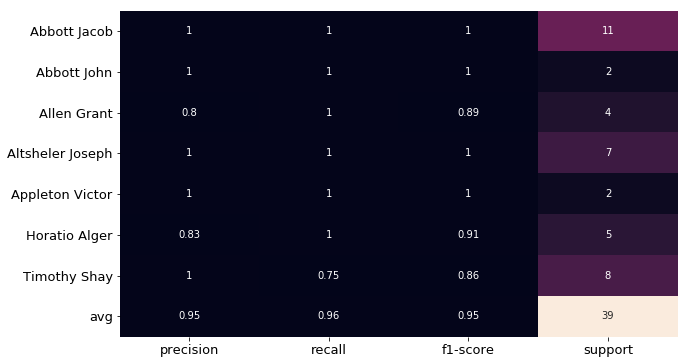

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(C=0.2)
pr = clf.fit(X_train_counts.toarray(), y_train)
pr = clf.predict(X_test_counts.toarray())
plot_classification_report(y_test, pr)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train_counts.toarray())
X_train_counts_scale = scaler.transform(X_train_counts.toarray())
X_test_counts_scale = scaler.transform(X_test_counts.toarray())
model = Sequential()
    
model.add(Dense(512, activation='relu', input_dim=X_train_counts_scale.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.15))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.05))
model.add(Dense(7, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
            optimizer = keras.optimizers.RMSprop(),
             metrics=['accuracy'])
model.fit(X_train_counts_scale, y_train1h,
        batch_size=128,
        epochs=10,
        verbose=1,
        validation_data=(X_test_counts_scale, y_test1h))
score = model.evaluate(X_test_counts_scale, y_test1h, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

C:\Users\PhucCoi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning:

Data with input dtype int64 was converted to float64 by MinMaxScaler.



Train on 154 samples, validate on 39 samples
Epoch 1/10
154/154 [==============================] - 5s 30ms/step - loss: 2.9372 - acc: 0.0974 - val_loss: 5.1037 - val_acc: 0.2051
Epoch 2/10
154/154 [==============================] - 3s 18ms/step - loss: 5.5035 - acc: 0.1883 - val_loss: 2.9461 - val_acc: 0.4103
Epoch 3/10
154/154 [==============================] - 3s 17ms/step - loss: 2.6901 - acc: 0.3377 - val_loss: 1.2635 - val_acc: 0.5385
Epoch 4/10
154/154 [==============================] - 3s 17ms/step - loss: 0.9241 - acc: 0.6883 - val_loss: 0.5117 - val_acc: 0.8974
Epoch 5/10
154/154 [==============================] - 3s 17ms/step - loss: 0.2157 - acc: 0.9481 - val_loss: 0.4931 - val_acc: 0.7949
Epoch 6/10
154/154 [==============================] - 3s 17ms/step - loss: 0.1635 - acc: 0.9416 - val_loss: 0.2707 - val_acc: 0.9487
Epoch 7/10
154/154 [==============================] - 3s 17ms/step - loss: 0.0274 - acc: 1.0000 - val_loss: 0.1992 - val_acc: 0.9744
Epoch 8/10
154/154 [====

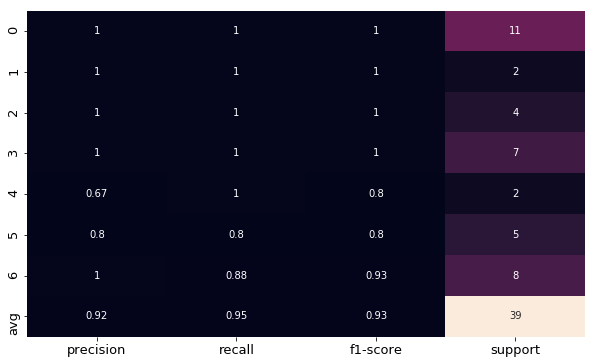

In [ ]:
from sklearn.metrics import classification_report
classes = model.predict_classes(X_test_counts_scale, batch_size = None)
plot_classification_report(y_testenc, classes)

# Word2Vec 

In [ ]:
from gensim.models.word2vec import Word2Vec
from gensim.models.ldamulticore import LdaMulticore
import re, itertools 
import nltk 
from nltk.corpus import stopwords

In [ ]:
data.head()

author                 title  \
0  Abbott Jacob   Alexander the Great   
1  Abbott Jacob                 Bruno   
2  Abbott Jacob  Caleb in the Country   
3  Abbott Jacob             Charles I   
4  Abbott Jacob             Cleopatra   

                                                text  \
0  ﻿the project ebook, alexander the great, by   ...   
1  ﻿the project ebook of bruno, by   this ebook i...   
2  ﻿the project ebook, caleb in the country, by  ...   
3  ﻿the project ebook of charles i, by   this ebo...   
4  ﻿the project ebook, cleopatra, by    this eboo...   

                                            sentence  
0  [﻿the project ebook, alexander the great, by  ...  
1  [﻿the project ebook of bruno, by   this ebook ...  
2  [﻿the project ebook, caleb in the country, by ...  
3  [﻿the project ebook of charles i, by   this eb...  
4  [﻿the project ebook, cleopatra, by    this ebo...

### Removal special characters

In [ ]:
data.sentence[0][84]

'--philip attempt on his son'

In [ ]:
re.sub(r'[?|$|.|!|,|)|#|@|!|$|%|^|&|*|_|;|\|<|>|~|`|{|]|[|}|/|"|=|:|(|-]',r'','--@p&h{i*lip; a^tte$#mpt on !his) (so$n()')

'philip attempt on his son'

In [ ]:
removal_spec_char = lambda sense: re.sub(r'[?|$|.|!|,|)|#|@|!|$|%|^|&|*|_|;|\|<|>|~|`|{|]|[|}|/|"|=|:|(|-]',r'',sense)

In [ ]:
data.sentence = list(map(lambda sentences : list(map(removal_spec_char,sentences)),data.sentence))

### Removal redundant spaces

In [ ]:
removal_redundant_space = lambda sense : re.sub(' +',' ',sense)

In [ ]:
data.sentence = list(map(lambda sentences : list(map(removal_redundant_space,sentences)),data.sentence))

In [ ]:
data.sentence[0][14]

'zip makers of history alexander the great by with engravings new york and london harper brothers publishers 1902 entered according to act of congress in the year one thousand eight hundred and fortynine by harper brothers in the clerk office of the district court of the southern district of new york'

In [ ]:
data.sentence[0][14]

'zip makers of history alexander the great by with engravings new york and london harper brothers publishers 1902 entered according to act of congress in the year one thousand eight hundred and fortynine by harper brothers in the clerk office of the district court of the southern district of new york'

###  Lemmatization & Stemming 

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize
import nltk
nltk.download('wordnet')
lemm = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\PhucCoi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
for idx, arr in enumerate(data.sentence):
    for idx1, sen in enumerate(arr):
        words = word_tokenize(sen)
        for _word in words:
            data.sentence[idx][idx1] = (data.sentence[idx][idx1]).replace(_word,lemm.lemmatize(_word))

In [ ]:
from nltk.stem import PorterStemmer
stemmer = nltk.stem.PorterStemmer()
ps = PorterStemmer()

In [ ]:
ps.stem('themselve') 

'themselv'

In [ ]:
ps.stem('suppose') 

'suppos'

### Tokenization

In [ ]:
from nltk.tokenize import word_tokenize
tokens = word_tokenize(data.sentence[0][14])
print(tokens)

['zip', 'maker', 'of', 'history', 'alexander', 'the', 'great', 'by', 'with', 'engraving', 'new', 'york', 'and', 'london', 'harper', 'brother', 'publisher', '1902', 'entered', 'according', 'to', 'act', 'of', 'congress', 'in', 'the', 'year', 'one', 'thousand', 'eight', 'hundred', 'and', 'fortynine', 'by', 'harper', 'brother', 'in', 'the', 'clerk', 'office', 'of', 'the', 'district', 'court', 'of', 'the', 'southern', 'district', 'of', 'new', 'york']


In [ ]:
data.sentence = list(map(lambda sentences:list(map(nltk.word_tokenize, sentences)),data.sentence))  

In [ ]:
data.sentence = list(map(lambda sentences:list(filter(None, sentences)),data.sentence))  

In [ ]:
_input = []
[_input.extend(token) for token in data.sentence]

In [ ]:
_input[111]

['the',
 'persian',
 'had',
 'enormous',
 'army',
 'perfectly',
 'provided',
 'for',
 'with',
 'beautiful',
 'tent',
 'horse',
 'elegantly',
 'caparisoned',
 'arm',
 'and',
 'munition',
 'of',
 'war',
 'of',
 'the',
 'finest',
 'workmanship',
 'and',
 'officer',
 'magnificently',
 'dressed',
 'and',
 'accustomed',
 'to',
 'a',
 'life',
 'of',
 'luxury',
 'and',
 'splendor']

In [ ]:
print("Number of sentences: {}.".format(len(_input)))
print("Number of texts: {}.".format(len(data)))
size_dimention = 500  # Dimensionality of the word vectors.
sample = 1e-5   # The threshold for configuring which higher-frequency words are randomly downsampled, useful range is (0, 1e-5).
W2Vmodel = Word2Vec(sentences=_input,
                    size=size_dimention,
                    sample=sample,
                    negative=10, # how many “noise words” should be drawn (usually between 5-20)
                    iter=5)

Number of sentences: 773538.
Number of texts: 193.


### Similarity - related words

In [ ]:
W2Vmodel.wv.most_similar(positive='sleep', topn =3)

[('awake', 0.964647650718689),
 ('waited', 0.9500022530555725),
 ('tired', 0.9455375671386719)]

In [ ]:
W2Vmodel.wv.most_similar(positive='welcome', topn =3)

[('solemnly', 0.9617931842803955),
 ('halbert', 0.9616749286651611),
 ('reluctantly', 0.9601818323135376)]

### Similarity - 2 words

In [ ]:
W2Vmodel.wv.similarity(w1='tired',w2='exhausted')

0.390012

In [ ]:
W2Vmodel.wv.similarity(w1='man',w2='boy')

0.697983

In [ ]:
W2Vmodel.wv.similarity(w1='cock',w2='dick')

0.73282063

In [ ]:
W2Vmodel.wv.save_word2vec_format('model.bin')

In [ ]:
W2Vmodel.wv.save_word2vec_format('model.txt', binary=False)

In [ ]:
X = W2Vmodel[W2Vmodel.wv.vocab]

In [ ]:
X.shape

(31849, 500)

In [ ]:
pca = PCA(n_components=2)
result = pca.fit_transform(X)

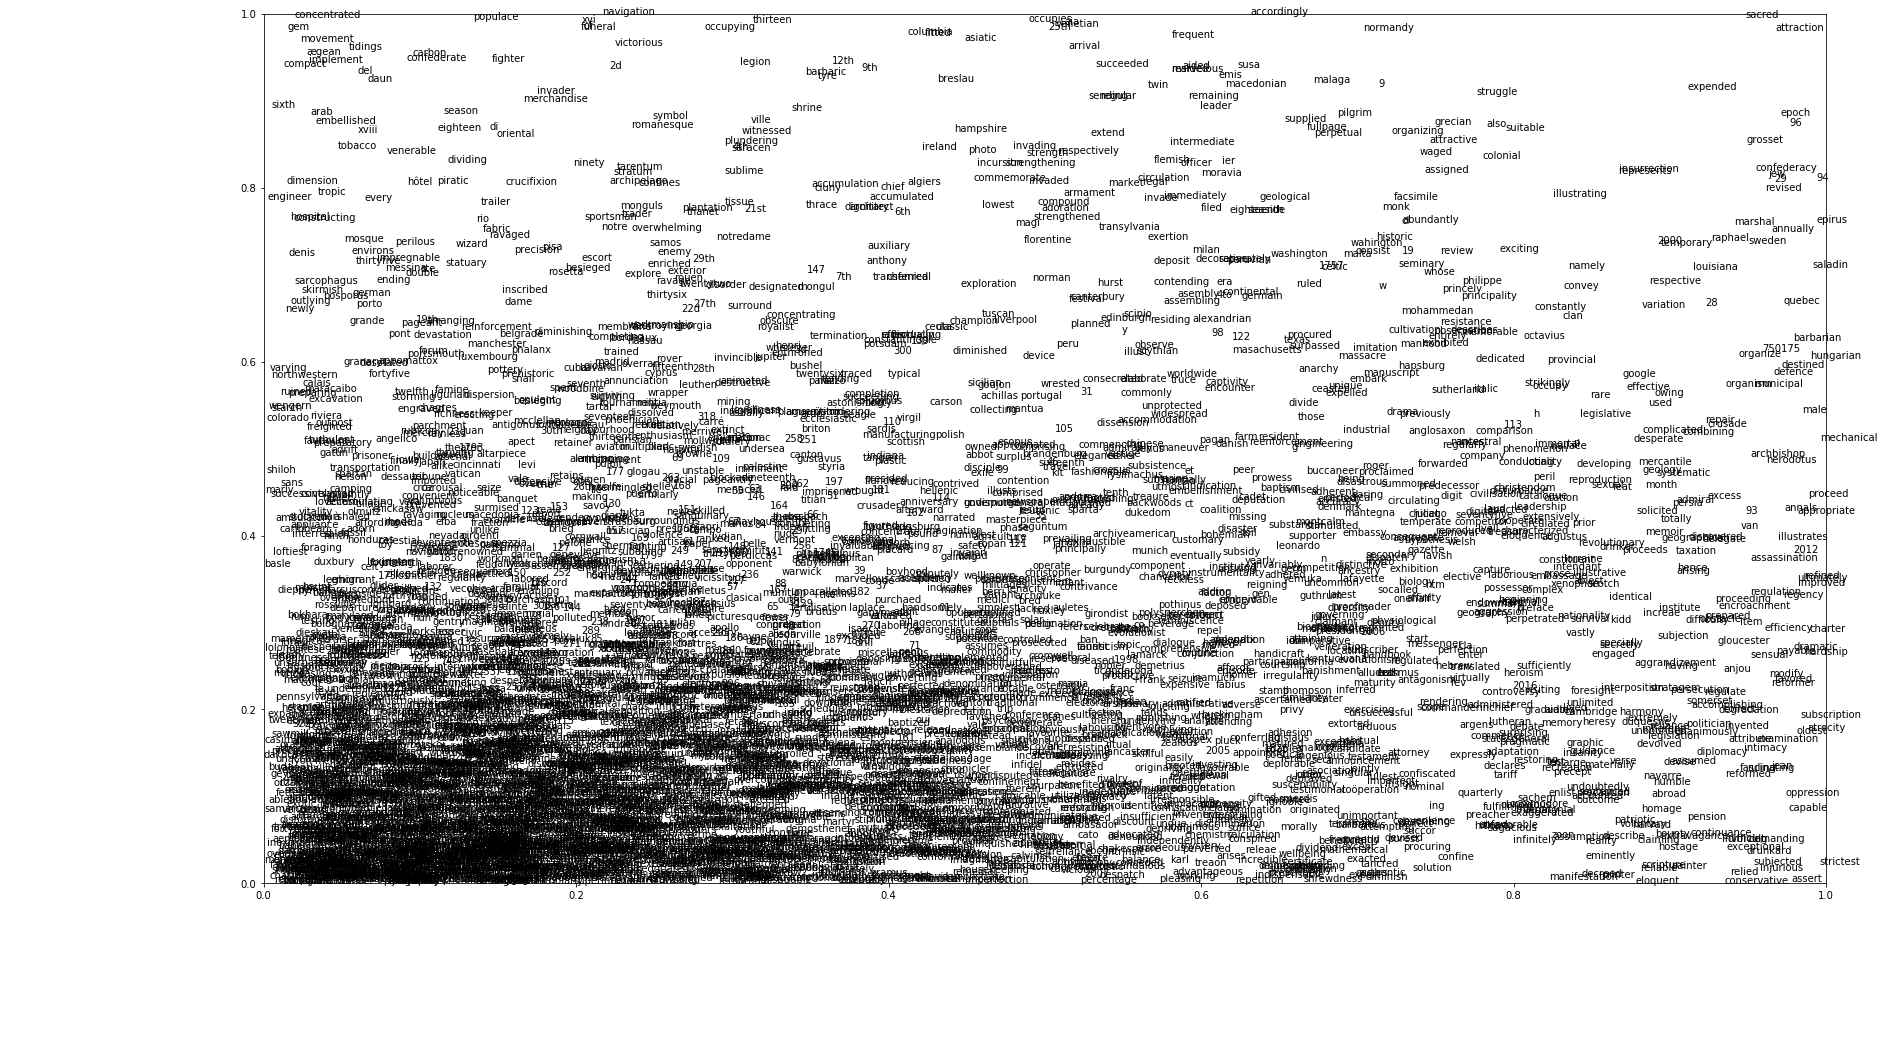

In [ ]:
words = list(W2Vmodel.wv.vocab)
pyplot.figure(figsize=(28,16))
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.savefig('w2v.png')

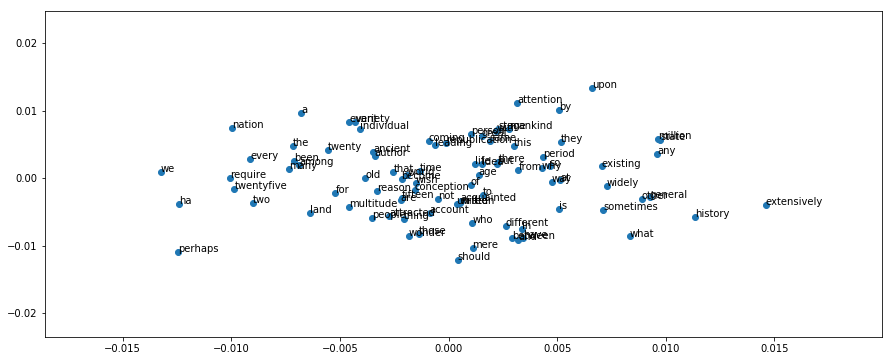

In [ ]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot
# define training data
sentences = [['the', 'history', 'of', 'the', 'life', 'of', 'every', 'individual', 'who', 'ha', 'for', 'any', 'reason', 'attracted', 'extensively', 'the', 'attention', 'of', 'mankind', 'ha', 'been', 'written', 'in', 'a', 'great', 'variety',
 'of', 'way', 'by', 'a', 'multitude', 'of', 'author', 'and', 'person', 'sometimes', 'wonder', 'why', 'we', 'should', 'have', 'so', 'many', 'different', 'account',
 'of', 'the', 'same', 'thing'],['among', 'the', 'twenty', 'million', 'of', 'people', 'in', 'the', 'united', 'state', 'there', 'are', 'perhaps',
 'two', 'million', 'between', 'the', 'age', 'of', 'fifteen', 'and', 'twentyfive',
 'who', 'wish', 'to', 'become', 'acquainted', 'in', 'general', 'with', 'the', 'leading', 'event', 'in', 'the', 'history', 'of', 'the', 'old', 'world', 'and', 'of', 'ancient', 'time', 'but', 'who', 'coming', 'upon', 'the', 'stage', 'in', 'this', 'land', 'and', 'at', 'this', 'period', 'have', 'idea', 'and', 'conception', 'so', 'widely', 'different', 'from', 'those', 'of', 'other', 'nation', 'and', 'of', 'other', 'time', 'that', 'a', 'mere', 'republication', 'of', 'existing',
 'account', 'is', 'not', 'what', 'they', 'require']]
# train model
model = Word2Vec(sentences, min_count=1)
# fit a 2d PCA model to the vectors
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.figure(figsize=(15,6))
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

In [ ]:
df = pd.read_csv('F:\data\Author Classification\model.txt', sep='\s+', index_col=0, header=None, skiprows=1).T
df.head(20)

0        the       and        of         a        to        in        he  \
1  -0.058613  0.015442 -0.158179  0.140175  0.093452  0.018156  0.119811   
2  -0.167606 -0.107773 -0.029066 -0.206769 -0.091758 -0.089092 -0.154339   
3   0.050763 -0.017081 -0.124401  0.155085  0.175548 -0.029413  0.246189   
4   0.283456  0.208988  0.110836 -0.007077  0.265104  0.023497 -0.027724   
5   0.152869 -0.006580 -0.009774  0.116188  0.039773  0.047682  0.008068   
6  -0.303850 -0.240901 -0.141896 -0.353064 -0.236885 -0.251803 -0.135014   
7  -0.060181 -0.018076 -0.095351  0.063036  0.152779 -0.043313  0.204786   
8  -0.018450  0.055413  0.150328 -0.057409  0.122050  0.004888  0.025636   
9   0.150711 -0.045342  0.113541  0.078095 -0.092342  0.082688  0.048401   
10 -0.152842  0.002193 -0.028607 -0.103305 -0.122894 -0.142592 -0.069936   
11 -0.188796  0.049980 -0.101884  0.049344  0.027191 -0.034822  0.121647   
12 -0.227988 -0.082256 -0.169879  0.020645 -0.337892 -0.260778 -0.196370   
13 -0.278576 -0.213016 -0.216634 -0.257885 -0.228505 -0.178709 -0.015974   
14 -0.121900  0.054529 -0.041423  0.020872 -0.166908 -0.110759  0.009720   
15  0.149113  0.023697 -0.047201  0.229221  0.211310  0.105426  0.255376   
16 -0.052681 -0.270437 -0.356287 -0.095706  0.140724 -0.147333  0.166163   
17 -0.007686  0.095614 -0.027380  0.069744  0.215132  0.101468  0.159572   
18  0.021411  0.125767 -0.062614 -0.200714  0.314978  0.147919  0.129720   
19  0.063170  0.217446  0.076196  0.184575  0.072014  0.097175  0.251965   
20 -0.009897  0.167713 -0.112900  0.066142  0.080910 -0.017773  0.271874   

0         wa        it         i    ...         ammy       mim  candyman  \
1   0.044857  0.351965  0.480889    ...     0.036848  0.060897  0.072883   
2  -0.113168 -0.195455 -0.007680    ...    -0.008903 -0.024123 -0.023799   
3   0.039933  0.143591  0.205823    ...     0.002832  0.014112  0.011426   
4  -0.074092  0.075550 -0.089214    ...     0.003451  0.012912  0.016158   
5  -0.107139  0.040009 -0.013390    ...    -0.000931 -0.006203  0.000539   
6  -0.171172 -0.240512 -0.066822    ...    -0.017229 -0.034056 -0.035705   
7   0.116359  0.238132  0.519161    ...     0.034326  0.054077  0.054955   
8   0.120896  0.028930 -0.081630    ...     0.013735  0.023155  0.025410   
9   0.212850 -0.003304 -0.105927    ...     0.013470  0.031545  0.030628   
10 -0.051416 -0.089264 -0.050450    ...     0.009329  0.018636  0.020544   
11 -0.002974 -0.006251  0.174917    ...     0.028788  0.042119  0.046546   
12 -0.184649 -0.128782 -0.064836    ...    -0.010612 -0.024580 -0.021009   
13  0.011732 -0.259128 -0.269039    ...    -0.057053 -0.093482 -0.108337   
14  0.003876 -0.148275  0.010736    ...     0.000579  0.006467  0.003136   
15  0.147535  0.303900  0.339760    ...     0.015055  0.026943  0.025927   
16 -0.087852 -0.159125  0.099707    ...    -0.010989 -0.021068 -0.023177   
17  0.108909  0.189237  0.243321    ...     0.022224  0.036539  0.036332   
18  0.102242  0.121232  0.162190    ...     0.011090  0.025629  0.025713   
19  0.282536  0.092816 -0.030402    ...     0.016258  0.032537  0.034783   
20  0.098067  0.049297  0.000925    ...    -0.005948 -0.000048 -0.006128   

0   washboiler  mincepie     ruben    croome    mamlet  postnotes   bettina  
1     0.040233  0.048775  0.059252  0.029014  0.047536   0.034878  0.043068  
2    -0.013842 -0.015706 -0.023821 -0.014749 -0.013498  -0.011608 -0.019654  
3     0.006556  0.012816  0.004323 -0.006120  0.006841   0.008062  0.006986  
4     0.011206  0.010511  0.012700  0.006781  0.007779   0.008678  0.016355  
5    -0.003435 -0.003693 -0.003387 -0.002963 -0.003910  -0.001301 -0.003683  
6    -0.034550 -0.028613 -0.038040 -0.018091 -0.030413  -0.033564 -0.027356  
7     0.037770  0.042445  0.055588  0.021609  0.046166   0.026153  0.034271  
8     0.019518  0.019151  0.035002  0.024967  0.015244   0.024142  0.023824  
9     0.021006  0.022784  0.024101  0.013085  0.021289   0.009966  0.025659  
10    0.014005  0.011381  

In [ ]:
df.the

1     -0.058613
2     -0.167606
3      0.050763
4      0.283456
5      0.152869
6     -0.303850
7     -0.060181
8     -0.018450
9      0.150711
10    -0.152842
11    -0.188796
12    -0.227988
13    -0.278576
14    -0.121900
15     0.149113
16    -0.052681
17    -0.007686
18     0.021411
19     0.063170
20    -0.009897
21    -0.222535
22    -0.039088
23    -0.083650
24     0.093758
25    -0.039124
26     0.049502
27    -0.075959
28    -0.029226
29    -0.066851
30     0.158439
         ...   
471   -0.115805
472    0.347668
473    0.021904
474    0.105838
475   -0.020328
476    0.285568
477    0.159947
478    0.063950
479    0.062810
480   -0.008594
481   -0.034502
482    0.022547
483    0.073297
484   -0.121387
485    0.222254
486   -0.039233
487   -0.095096
488    0.254558
489    0.139062
490   -0.222924
491   -0.024708
492    0.014235
493   -0.043048
494    0.088436
495    0.095930
496    0.006467
497   -0.023313
498   -0.129955
499    0.069988
500    0.041129
Name: the, Length: 500, 

In [ ]:
import re
def untokenize(words):
    text = ' '.join(words)
    step1 = text.replace("`` ", '"').replace(" ''", '"').replace('. . .',  '...')
    step2 = step1.replace(" ( ", " (").replace(" ) ", ") ")
    step3 = re.sub(r' ([.,:;?!%]+)([ \'"`])', r"\1\2", step2)
    step4 = re.sub(r' ([.,:;?!%]+)$', r"\1", step3)
    step5 = step4.replace(" '", "'").replace(" n't", "n't").replace(
         "can not", "cannot")
    step6 = step5.replace(" ` ", " '")
    return step6.strip()

In [ ]:
data.sentence = list(map(lambda sentences:list(map(untokenize, sentences)),data.sentence))  

In [ ]:
data.sentence[0]
[['\ufeffthe',
  'project',
  'ebook',
  'alexander',
  'the',
  'great',
  'by',
  'this',
  'ebook',
  'is',
  'for',
  'the',
  'use',
  'of',
  'anyone',
  'anywhere',
  'at',
  'no',
  'cost',
  'and',
  'with',
  'almost',
  'no',
  'restriction',
  'whatsoever'],

In [ ]:
#https://github.com/bluelight773/Kaggle_IMDB_Bags_of_Popcorn
from bs4 import BeautifulSoup
def html_to_text(html):
    """Return extracted text string from provided HTML string."""
    text = BeautifulSoup(html.strip(), "lxml")
    text = " ".join(text.strings)  # One may/not need to use strip()
    return html

def text_to_wordlist(text, get_text_from_html=False, letters_only=True, lowercase=True, remove_stopwords=False):
    """Convert text to a sequence of words with the specified preprocessing applied.
    Returns a list of words.
    """

    # 1. Remove HTML
    # review_text = BeautifulSoup(review).get_text()
    if get_text_from_html:
        text = html_to_text(text)

    # 2. Remove non-letters
    if letters_only:
        text = letters_only(text)

    # 3. Convert words to lower case and split them
    if lowercase:
        text = text.lower()

    words = text.split()

    # 4. Optionally remove stop words (false by default)
    if remove_stopwords:
        words = [w for w in words if w not in stop_words]

    # 5. Return a list of words
    return(words)


# -1 accounts for first row being run twice when map is used (by design)
reviews_converted_to_sentences = -1
def get_w2v_features(review, get_text_from_html=True, letters_only=True, lowercase=True, remove_stopwords=True,
                     num_features=300):
    """Average all of the word vectors in the provided review after pre-processing it according to the parameter values.
    Based on https://www.kaggle.com/c/word2vec-nlp-tutorial/details/part-3-more-fun-with-word-vectors
    """
    global stop_words, reviews_done, w2v_model, index2word_set

    # Note that one would expect appropriate and consistent preprocessing should be before feeding data for training w2v
    # model and before attempting to get w2v features.  However, empirical verification is the only way to know for sure
    # (eg when may be better off removing stopwords even if Google News model includes them)
    words = text_to_wordlist(review, get_text_from_html=get_text_from_html, letters_only=letters_only,
                             lowercase=lowercase,
                             remove_stopwords=remove_stopwords)

    # Pre-initialize an empty numpy array (for speed)
    # All-zeros will be what's returned if none of the words are in the w2v model
    feature_vec = np.zeros((num_features,), dtype="float32")
    nwords = 0.

    # Loop over each word in the review and, if it is in the model's vocabulary, add its feature vector to the total
    for word in words:
        if word in index2word_set:
            nwords = nwords + 1.
            feature_vec = np.add(feature_vec, w2v_model[word])

    # Divide the result by the number of words to get the average
    feature_vec = np.divide(feature_vec, nwords)

    reviews_done += 1
    if reviews_done % 500 == 0:
        print("Word2Vec features extracted for {} reviews".format(reviews_done))

    return feature_vec

In [ ]:
data['w2v_features'] = list(map(lambda senten:get_w2v_features(W2Vmodel, senten),data.sentence))

In [ ]:
data.head()

author                 title  \
0  Abbott Jacob   Alexander the Great   
1  Abbott Jacob                 Bruno   
2  Abbott Jacob  Caleb in the Country   
3  Abbott Jacob             Charles I   
4  Abbott Jacob             Cleopatra   

                                                text  \
0  ﻿the project ebook, alexander the great, by   ...   
1  ﻿the project ebook of bruno, by   this ebook i...   
2  ﻿the project ebook, caleb in the country, by  ...   
3  ﻿the project ebook of charles i, by   this ebo...   
4  ﻿the project ebook, cleopatra, by    this eboo...   

                                            sentence  \
0  [[﻿the, project, ebook, alexander, the, great,...   
1  [[﻿the, project, ebook, of, bruno, by, this, e...   
2  [[﻿the, project, ebook, caleb, in, the, countr...   
3  [[﻿the, project, ebook, of, charles, i, by, th...   
4  [[﻿the, project, ebook, cleopatra, by, this, e...   

                                        w2v_features  
0  [0.09259578, 0.10967822, -0.032081384, -0.0046...  
1  [0.074832514, 0.08163656, -0.034389686, 0.0222...  
2  [0.057736956, 0.06581772, -0.018010892, 0.0313...  
3  [0.072724104, 0.088323265, -0.026417933, -0.00...  
4  [0.08771339, 0.10481417, -0.024504583, -0.0048...

In [ ]:
data.to_csv('F:\\data\\Author Classification\\fulldataframe.csv')

In [ ]:
W2Vmodel.wv.save_word2vec_format('W2Vmodel.bin', binary=True)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.w2v_features, data.author, test_size=0.2, random_state=12)

In [ ]:
print("training shape: {}{}".format(X_train.shape,y_train.shape))
print("testing shape : {}{}".format(X_test.shape,y_test.shape))

training shape: (154,)(154,)
testing shape : (39,)(39,)


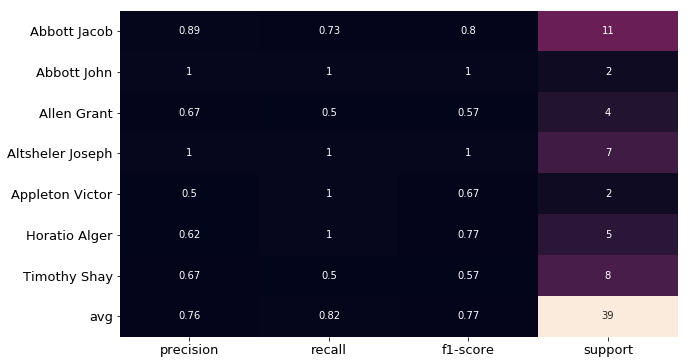

In [ ]:
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

rfc_model = RandomForestClassifier(n_estimators=100, random_state=888)
rfc_model.fit(np.array(list(map(np.array, X_train))),y_train)
pr = rfc_model.predict(np.array(list(map(np.array, X_test))))
plot_classification_report(y_test, pr)

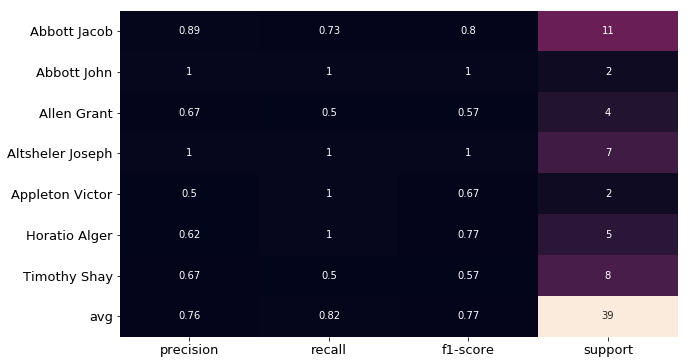

In [ ]:
from sklearn.svm import LinearSVC
clf = LinearSVC(C=1.5)
clf.fit(np.array(list(map(np.array, X_train))),y_train)
pr = rfc_model.predict(np.array(list(map(np.array, X_test))))
plot_classification_report(y_test, pr)

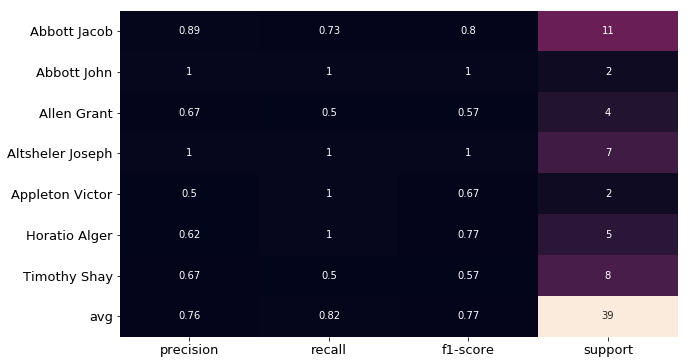

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(C=4)
clf.fit(np.array(list(map(np.array, X_train))),y_train)
pr = rfc_model.predict(np.array(list(map(np.array, X_test))))
plot_classification_report(y_test, pr)

In [ ]:
from sklearn.model_selection import train_test_split
# preprocessing imports
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
# model imports
from gensim.models.ldamulticore import LdaMulticore
from gensim.models.word2vec import Word2Vec
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
# hyperparameter training imports
from sklearn.model_selection import GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(data.w2v_features, data.author, test_size=0.2, random_state=12)

Train on 154 samples, validate on 39 samples
Epoch 1/10
154/154 [==============================] - 2s 12ms/step - loss: 1.9712 - acc: 0.1234 - val_loss: 1.9409 - val_acc: 0.0513
Epoch 2/10
154/154 [==============================] - 0s 715us/step - loss: 1.9623 - acc: 0.1688 - val_loss: 1.9166 - val_acc: 0.2051
Epoch 3/10
154/154 [==============================] - 0s 715us/step - loss: 1.9289 - acc: 0.1883 - val_loss: 1.9245 - val_acc: 0.1282
Epoch 4/10
154/154 [==============================] - 0s 780us/step - loss: 1.8812 - acc: 0.1623 - val_loss: 1.8440 - val_acc: 0.2308
Epoch 5/10
154/154 [==============================] - 0s 715us/step - loss: 1.7976 - acc: 0.2078 - val_loss: 2.6233 - val_acc: 0.1795
Epoch 6/10
154/154 [==============================] - 0s 734us/step - loss: 2.2856 - acc: 0.1623 - val_loss: 1.8435 - val_acc: 0.2821
Epoch 7/10
154/154 [==============================] - 0s 747us/step - loss: 1.8039 - acc: 0.2662 - val_loss: 1.7964 - val_acc: 0.1795
Epoch 8/10
154/154

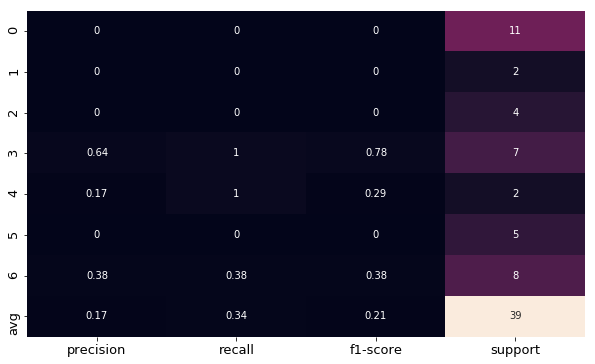

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X=LabelEncoder()
y_trainenc = labelencoder_X.fit_transform(y_train)
y_testenc=labelencoder_X.transform(y_test)
from keras import utils as np_utils
y_train_ = np_utils.to_categorical(y_trainenc, 7)
y_test_ = np_utils.to_categorical(y_testenc, 7)

import keras
model = Sequential()
    
model.add(Dense(512, activation='relu', input_dim=np.array(list(map(np.array, X_train))).shape[1]))
model.add(Dropout(0.15))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.05))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.15))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.05))
model.add(Dense(7, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
            optimizer = keras.optimizers.RMSprop(),
             metrics=['accuracy'])
model.fit(np.array(list(map(np.array, X_train))), y_train_,
        batch_size=128,
        epochs=10,
        verbose=1,
        validation_data=(np.array(list(map(np.array, X_test))), y_test_))
score = model.evaluate(np.array(list(map(np.array, X_test))), y_test_, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])
from sklearn.metrics import classification_report
y_predict = model.predict_classes(np.array(list(map(np.array, X_test))), batch_size = None)
plot_classification_report(y_testenc, y_predict)

# Topic Modeling using LDA

![](http://bigdata.ices.utexas.edu/wp-content/uploads/2015/01/LDA-concept.png)

In [ ]:
data.sentence[0]
[['\ufeffthe',
  'project',
  'ebook',
  'alexander',
  'the',
  'great',
  'by',
  'this',
  'ebook',
  'is',
  'for',
  'the',
  'use',

In [ ]:
import re
def untokenize(words):
    text = ' '.join(words)
    step1 = text.replace("`` ", '"').replace(" ''", '"').replace('. . .',  '...')
    step2 = step1.replace(" ( ", " (").replace(" ) ", ") ")
    step3 = re.sub(r' ([.,:;?!%]+)([ \'"`])', r"\1\2", step2)
    step4 = re.sub(r' ([.,:;?!%]+)$', r"\1", step3)
    step5 = step4.replace(" '", "'").replace(" n't", "n't").replace(
         "can not", "cannot")
    step6 = step5.replace(" ` ", " '")
    return step6.strip()

In [ ]:
data['untokenize']= list(map(lambda sentences:list(map(untokenize, sentences)),data.sentence))  

In [ ]:
data.head()

author                 title  \
0  Abbott Jacob   Alexander the Great   
1  Abbott Jacob                 Bruno   
2  Abbott Jacob  Caleb in the Country   
3  Abbott Jacob             Charles I   
4  Abbott Jacob             Cleopatra   

                                                text  \
0  ﻿the project ebook, alexander the great, by   ...   
1  ﻿the project ebook of bruno, by   this ebook i...   
2  ﻿the project ebook, caleb in the country, by  ...   
3  ﻿the project ebook of charles i, by   this ebo...   
4  ﻿the project ebook, cleopatra, by    this eboo...   

                                            sentence  \
0  [[﻿the, project, ebook, alexander, the, great,...   
1  [[﻿the, project, ebook, of, bruno, by, this, e...   
2  [[﻿the, project, ebook, caleb, in, the, countr...   
3  [[﻿the, project, ebook, of, charles, i, by, th...   
4  [[﻿the, project, ebook, cleopatra, by, this, e...   

                                        w2v_features  \
0  [0.080672875, -0.058291655, 0.0072988723, 0.10...   
1  [0.14818683, -0.059004176, 0.06520473, 0.08157...   
2  [0.17535397, -0.05653682, 0.0731933, 0.0876790...   
3  [0.08831859, -0.04906485, 0.009179941, 0.09389...   
4  [0.0796483, -0.05462291, 0.0011151998, 0.10026...   

                                          untokenize  
0  [﻿the project ebook alexander the great by thi...  
1  [﻿the project ebook of bruno by this ebook is ...  
2  [﻿the project ebook caleb in the country by th...  
3  [﻿the project ebook of charles i by this ebook...  
4  [﻿the project ebook cleopatra by this ebook is...

### Cleaning and Preprocessing


In [ ]:
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import string
stop = set(stopwords.words('english'))
exclude = set(string.punctuation) 
lemma = WordNetLemmatizer()
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

doc_clean = [clean(doc).split() for doc in data.text] 

In [ ]:
len(doc_clean)

193

### Preparing Document-Term Matrix


In [ ]:
# Importing Gensim
import gensim
from gensim import corpora

# Creating the term dictionary of our courpus, where every unique term is assigned an index. 
dictionary = corpora.Dictionary(doc_clean)

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

In [ ]:
len(dictionary)

115110

In [ ]:
len(doc_term_matrix)

193

In [ ]:
doc_term_matrix[0] 
'''
[(0, 3),
 (1, 1),
 (2, 1),
 (3, 1),
 (4, 1),
 (5, 1),
 (6, 1),
 (7, 1),
 (8, 1),
 (9, 1),
 (10, 1),
 (11, 1),
 (12, 1),
'''

### Running LDA Model


In [ ]:
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

# Running and Training LDA model on the document term matrix.
ldamodel = Lda(doc_term_matrix, num_topics=7, id2word = dictionary, passes=50)

In [ ]:
ldamodel.alpha

array([0.14285715, 0.14285715, 0.14285715, 0.14285715, 0.14285715,
       0.14285715, 0.14285715], dtype=float32)

In [ ]:
ldamodel.print_topics(num_topics=10, num_words=3)

[(0, '0.010*"said" + 0.006*"would" + 0.006*"it"'),
 (1, '0.006*"one" + 0.006*"work" + 0.004*"great"'),
 (2, '0.013*"mr" + 0.010*"said" + 0.006*"one"'),
 (3, '0.006*"upon" + 0.006*"king" + 0.006*"one"'),
 (4, '0.014*"said" + 0.012*"mr" + 0.010*"tom"'),
 (5, '0.011*"said" + 0.009*"ned" + 0.008*"it"'),
 (6, '0.006*"one" + 0.006*"it" + 0.005*"said"')]

In [ ]:
ldamodel.show_topics(num_topics=10, num_words=10, log=False, formatted=True)

[(0,
  '0.010*"said" + 0.006*"would" + 0.006*"it" + 0.006*"one" + 0.006*"great" + 0.005*"could" + 0.004*"henry" + 0.004*"long" + 0.004*"men" + 0.004*"him"'),
 (1,
  '0.006*"one" + 0.006*"work" + 0.004*"great" + 0.004*"frederick" + 0.003*"may" + 0.003*"life" + 0.003*"first" + 0.003*"upon" + 0.003*"st" + 0.003*"time"'),
 (2,
  '0.013*"mr" + 0.010*"said" + 0.006*"one" + 0.006*"would" + 0.006*"upon" + 0.005*"i" + 0.005*"it" + 0.004*"time" + 0.004*"child" + 0.004*"man"'),
 (3,
  '0.006*"upon" + 0.006*"king" + 0.006*"one" + 0.005*"would" + 0.004*"time" + 0.004*"could" + 0.004*"great" + 0.003*"day" + 0.003*"him" + 0.003*"men"'),
 (4,
  '0.014*"said" + 0.012*"mr" + 0.010*"tom" + 0.008*"i" + 0.007*"it" + 0.007*"you" + 0.006*"“i" + 0.006*"would" + 0.005*"one" + 0.005*"boy"'),
 (5,
  '0.011*"said" + 0.009*"ned" + 0.008*"it" + 0.008*"one" + 0.006*"work" + 0.006*"go" + 0.006*"well" + 0.005*"get" + 0.005*"could" + 0.005*"would"'),
 (6,
  '0.006*"one" + 0.006*"it" + 0.005*"said" + 0.005*"man" + 0.004

In [ ]:
import pandas as pd

top_words_per_topic = []
for t in range(ldamodel.num_topics):
    top_words_per_topic.extend([(t, ) + x for x in ldamodel.show_topic(t, topn = 5)])

pd.DataFrame(top_words_per_topic, columns=['Topic', 'Word', 'P']).to_csv("top_words.csv")

In [ ]:
lda_df = pd.read_csv('top_words.csv',index_col=0)

In [ ]:
lda_df.shape

(35, 3)

In [ ]:
lda_df.Topic.unique()

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

In [ ]:
lda_df.head(15)

Topic       Word         P
0       0       said  0.009957
1       0      would  0.006188
2       0         it  0.005975
3       0        one  0.005758
4       0      great  0.005531
5       1        one  0.005586
6       1       work  0.005542
7       1      great  0.004263
8       1  frederick  0.003753
9       1        may  0.003139
10      2         mr  0.012563
11      2       said  0.009775
12      2        one  0.006429
13      2      would  0.005955
14      2       upon  0.005597

In [ ]:
import pyLDAvis.gensim
import pyLDAvis

In [ ]:
dictionary = corpora.Dictionary(doc_clean)

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

In [ ]:
from gensim import corpora
dictionary = corpora.Dictionary(doc_clean)
corpus =  [dictionary.doc2bow(doc) for doc in doc_clean]
import pickle
pickle.dump(corpus, open('corpus.pkl', 'wb'))
dictionary.save('dictionary.gensim')
dictionary = gensim.corpora.Dictionary.load('dictionary.gensim')
corpus = pickle.load(open('corpus.pkl', 'rb'))
lda_display3 = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display3)

In [ ]:
pyLDAvis.save_html(fileobj='pyLDAvis.html',data=lda_display3)

Saliency: a measure of how much the term tells you about the topic.

Relevance: a weighted average of the probability of the word given the topic and the word given the topic normalized by the probability of the topic.

# Non-negative matrix factorization

In [ ]:
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
lemm = WordNetLemmatizer()
class LemmaCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(LemmaCountVectorizer, self).build_analyzer()
        return lambda doc: (lemm.lemmatize(w) for w in analyzer(doc))
tf_vectorizer = LemmaCountVectorizer(max_df=0.95, 
                                     min_df=2,
                                     stop_words='english',
                                     decode_error='ignore')
tf = tf_vectorizer.fit_transform(data.text)

In [ ]:
tf_feature_names = tf_vectorizer.get_feature_names()


Topics in NMF model:


In [ ]:
from time import time
from sklearn.decomposition import NMF

t1 = time()
nmf = NMF(n_components=7, random_state=1,
          alpha=.1, l1_ratio=.5)
nnf_model = nmf.fit(tf)
print("Done in %0.3fs." % (time() - t1))

Done in 1.833s.


In [ ]:
len(nmf.components_)

7

In [ ]:
nmf.components_

array([[2.20171331e-01, 2.13856817e-03, 2.13856817e-03, ...,
        0.00000000e+00, 3.08993175e-03, 0.00000000e+00],
       [9.38970273e-01, 0.00000000e+00, 0.00000000e+00, ...,
        3.50038015e-03, 1.92019028e-04, 1.26556681e-02],
       [0.00000000e+00, 4.56631458e-04, 4.56631458e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 6.06228951e-04, 6.06228951e-04, ...,
        1.00332284e-04, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.30145305e-04, 1.30145305e-04, ...,
        1.68020045e-03, 0.00000000e+00, 1.18631978e-04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.37248645e-04]])

In [ ]:
nmf.components_[0]

array([0.22017133, 0.00213857, 0.00213857, ..., 0.        , 0.00308993,
       0.        ])

In [ ]:
nmf.components_[0].argsort()

array([35671, 11728, 11714, ..., 10747, 10792, 21352], dtype=int64)

In [ ]:
tf_feature_names[10747]

'dollar'

In [ ]:
message = "Topic # {}: ".format(0)
message += " ".join([tf_feature_names[i] for i in nmf.components_[0].argsort()[:-1000 - 1 :-1]])
message

'Topic # 0: mr dont dollar answered woman sir wife oh lady husband girl love dear rollo im street miss harley family uncle chapter gentleman wont george didnt mary herbert son frank grayson doctor spoke table don till andy afraid exclaimed ive smile lip hotel york store ernest sister thank spirit brother daughter round self nature bad beautiful hardly isnt god happy deal rich markland pleasant chance pocket window quickly town school cent aunt boat talk cried expression dinner wouldnt tear carriage circumstance sick captain cold stranger sum picture chair companion evil stay morrow chester getting floor edith heaven society desire wine fanny phil dan sorry glass past squire age ah ll board regard oclock wanted inquired oliver ben soul death later afternoon pain james jasper pale ago quiet helen prescott bear fortune drink conversation countenance dexter dead willing ear price write mountain grit sharp common natural body started dick sad chamber servant edward le silence likely youre a

In [ ]:
_doc=[]
# Define helper function to print top words
def print_top_words(model, feature_names, n_top_words):
    for index, topic in enumerate(model.components_):
        message = "\nTopic # {}:\n".format(index)
        message += " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1 :-1]])
        _doc.append(message)
        print(message)
        print("="*160)
print_top_words(nmf, tf_feature_names, 200)


Topic # 0:
mr dont dollar answered woman sir wife oh lady husband girl love dear rollo im street miss harley family uncle chapter gentleman wont george didnt mary herbert son frank grayson doctor spoke table don till andy afraid exclaimed ive smile lip hotel york store ernest sister thank spirit brother daughter round self nature bad beautiful hardly isnt god happy deal rich markland pleasant chance pocket window quickly town school cent aunt boat talk cried expression dinner wouldnt tear carriage circumstance sick captain cold stranger sum picture chair companion evil stay morrow chester getting floor edith heaven society desire wine fanny phil dan sorry glass past squire age ah ll board regard oclock wanted inquired oliver ben soul death later afternoon pain james jasper pale ago quiet helen prescott bear fortune drink conversation countenance dexter dead willing ear price write mountain grit sharp common natural body started dick sad chamber servant edward le silence likely youre a